# 프로젝트 명 : Seoul_Crime

# 1. 프로젝트 개요

In [263]:
import socket
from zipapp import MAIN_TEMPLATE

hostname = socket.gethostname()

## 2. 데이터 개요
### 1) 데이터 읽기

In [264]:
import pandas as pd
import numpy as np
crime_raw_data=pd.DataFrame()

if "Dongmin" in hostname:
    crime_raw_data=pd.read_csv("../../data/02.Seoul_Crime/02. crime_in_Seoul.csv",thousands=",",encoding="euc-kr")
else :
    crime_raw_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/02.Seoul_Crime/02. crime_in_Seoul.csv",thousands=",",encoding="euc-kr")

crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0


### 2) 데이터 개요 보기
- 문제점 :
  - RangeIndex : 65534
  - Not-null 데이터 : 310
  - null 데이터가 많음

In [265]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      310 non-null    object 
 1   죄종      310 non-null    object 
 2   발생검거    310 non-null    object 
 3   건수      310 non-null    float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


### 3) 잘못된 데이터 보기
- 죄종에 어떤 값이 들어가있는지 보기
- null 값에 얼마나 많은 데이터들이 있는지 보기

In [266]:
crime_raw_data["죄종"].unique()

array(['살인', '강도', '강간', '절도', '폭력', nan], dtype=object)

- 310번부터 65534번까지 데이터가 모두 NaN 값임

In [267]:
crime_raw_data[crime_raw_data["죄종"].isnull()]

,구분,죄종,발생검거,건수
310,NaN,NaN,NaN,NaN
311,NaN,NaN,NaN,NaN
312,NaN,NaN,NaN,NaN
313,NaN,NaN,NaN,NaN
314,NaN,NaN,NaN,NaN
...,...,...,...,...
65529,NaN,NaN,NaN,NaN
65530,NaN,NaN,NaN,NaN
65531,NaN,NaN,NaN,NaN
65532,NaN,NaN,NaN,NaN


In [268]:
crime_raw_data=crime_raw_data[crime_raw_data["죄종"].notnull()]

- 새로운 로우 데이터를 보면 정상적으로 보임
  - integer로 보임

In [269]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      310 non-null    object 
 1   죄종      310 non-null    object 
 2   발생검거    310 non-null    object 
 3   건수      310 non-null    float64
dtypes: float64(1), object(3)
memory usage: 12.1+ KB


# 3. Pandas Pivot table
- index, coloumn, values, aggfunc로 사용 함

In [270]:
df = pd.DataFrame()
df=pd.read_excel("../../data/02.Seoul_Crime/02. sales-funnel.xlsx", engine="openpyxl")
if "Dongmin" in hostname:
    pass
    #df=pd.read_excel("../../data/02.Seoul_Crime/02. sales-funnel.xlsx", engine="openpyxl")
else :
    df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/data/02.Seoul_Crime/02. sales-funnel.xlsx")

df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


#### values 설정

In [271]:
df.pivot_table(index=["Manager", "Rep"], values="Price")

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

#### aggfunc 를 통해 계산된 컬럼 출력

In [272]:
df.pivot_table(index=["Manager", "Rep"], values="Price",aggfunc=[np.sum,len])

sum   len
                              Price Price
Manager       Rep                        
Debra Henley  Craig Booker    80000     4
              Daniel Hilton  115000     3
              John Smith      40000     2
Fred Anderson Cedric Moss    110000     4
              Wendy Yule     177000     4

#### columns 설정

In [273]:
df.pivot_table(index=["Manager", "Rep"], values="Price",columns="Product",aggfunc=[np.sum,len])

sum                               len  \
Product                           CPU Maintenance Monitor Software  CPU   
Manager       Rep                                                         
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0  2.0   
              Daniel Hilton  105000.0         NaN     NaN  10000.0  2.0   
              John Smith      35000.0      5000.0     NaN      NaN  1.0   
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0  2.0   
              Wendy Yule     165000.0      7000.0  5000.0      NaN  2.0   

                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker          1.0     NaN      1.0  
              Daniel Hilton         NaN     NaN      1.0  
              John Smith            1.0     NaN      NaN  
Fred Anderson Cedric Moss           1.0     NaN      1.0  
              Wendy Yule            1.0     1.0      NaN

#### NaN값 설정 : fill valuem

In [274]:
df.pivot_table(index=["Manager", "Rep"], values="Price",columns="Product",aggfunc=[np.sum,len],fill_value=0)

sum                              len  \
Product                         CPU Maintenance Monitor Software CPU   
Manager       Rep                                                      
Debra Henley  Craig Booker    65000        5000       0    10000   2   
              Daniel Hilton  105000           0       0    10000   2   
              John Smith      35000        5000       0        0   1   
Fred Anderson Cedric Moss     95000        5000       0    10000   2   
              Wendy Yule     165000        7000    5000        0   2   

                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker            1       0        1  
              Daniel Hilton           0       0        1  
              John Smith              1       0        0  
Fred Anderson Cedric Moss             1       0        1  
              Wendy Yule              1       1        0

#### 2개 이상의 index와 values 설정

In [275]:
df.pivot_table(index=["Manager", "Rep","Product"], values=["Price","Quantity"],aggfunc=[np.sum,len],fill_value=0)

sum            len         
                                          Price Quantity Price Quantity
Manager       Rep           Product                                    
Debra Henley  Craig Booker  CPU           65000        2     2        2
                            Maintenance    5000        2     1        1
                            Software      10000        1     1        1
              Daniel Hilton CPU          105000        4     2        2
                            Software      10000        1     1        1
              John Smith    CPU           35000        1     1        1
                            Maintenance    5000        2     1        1
Fred Anderson Cedric Moss   CPU           95000        3     2        2
                            Maintenance    5000        1     1        1
                            Software      10000        1     1        1
              Wendy Yule    CPU          165000        7     2        2
                            Maintenance    7000        3     1        1
                            Monitor        5000        2     1        1

#### aggfunc 2개 이상 설정

In [276]:
df.pivot_table(
    index=["Manager", "Rep", "Product"],
    values=["Price", "Quantity"],
    aggfunc=[np.sum, np.mean],
    fill_value=0,
    margins=True
)

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

# 4. 서울시 범죄 현황 데이터 정리

- pivot table로 변경

In [277]:
crime_station = crime_raw_data.pivot_table(
    crime_raw_data,
    index="구분",
    columns=["죄종","발생검거"],
    aggfunc=[np.sum]
)
crime_station.head()

sum                                                              
         건수                                                              
죄종       강간           강도          살인           절도              폭력        
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생
구분                                                                       
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0

- column 데이터 확인

In [278]:
crime_station.columns

MultiIndex([('sum', '건수', '강간', '검거'),
            ('sum', '건수', '강간', '발생'),
            ('sum', '건수', '강도', '검거'),
            ('sum', '건수', '강도', '발생'),
            ('sum', '건수', '살인', '검거'),
            ('sum', '건수', '살인', '발생'),
            ('sum', '건수', '절도', '검거'),
            ('sum', '건수', '절도', '발생'),
            ('sum', '건수', '폭력', '검거'),
            ('sum', '건수', '폭력', '발생')],
           names=[None, None, '죄종', '발생검거'])

- 멀티 인덱스에서 하나의 데이터에 접근하기
- 시리즈로 반환 받음

In [279]:
crime_station['sum', '건수', '폭력', '발생']

구분
강남     2336.0
강동     2530.0
강북     2778.0
강서     3204.0
관악     3235.0
광진     2392.0
구로     3164.0
금천     2193.0
남대문     890.0
노원     2516.0
도봉     1441.0
동대문    2642.0
동작     1661.0
마포     2939.0
방배      500.0
서대문    1976.0
서부     1128.0
서초     1838.0
성동     1619.0
성북     1176.0
송파     3289.0
수서     1666.0
양천     2250.0
영등포    3593.0
용산     2384.0
은평     1536.0
종로     1291.0
종암      932.0
중랑     3164.0
중부     1335.0
혜화      972.0
Name: (sum, 건수, 폭력, 발생), dtype: float64

- droplevel : 다중 컬럼에서 특정컬럼 제거

In [280]:
crime_station.columns = crime_station.columns.droplevel([0,1])

In [281]:
crime_station.columns

MultiIndex([('강간', '검거'),
            ('강간', '발생'),
            ('강도', '검거'),
            ('강도', '발생'),
            ('살인', '검거'),
            ('살인', '발생'),
            ('절도', '검거'),
            ('절도', '발생'),
            ('폭력', '검거'),
            ('폭력', '발생')],
           names=['죄종', '발생검거'])

In [282]:
crime_station.head()

죄종       강간           강도          살인           절도              폭력        
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생
구분                                                                       
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0

- 현재 index= 경찰서 이름
- 경찰서 이름을 통해 지역구 이름 유추해야함

In [283]:
crime_station.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='구분')

# 4. Python 모듈 설치

## pip
- 파이썬 공식 모듈 관리자
- 명령어 :
  - pip list : 현재 설치된 모듈 반환
  - pip install 모듈명 : 모듈 설치
  - pip uninstall 모듈명 : 모듈 삭제

## conda
- pip는 콘다 환경에서 의존성 관리가 정확하지 않음
- 다른 명령어는 pip와 동일
- conda install -c 채널명 모듈 : 해당 채널에 모듈 설치
- 단, 모든 모듈이 콘다로 설치되는 것이 아님


In [284]:
get_ipython().system("pip list")

Package                   Version
------------------------- -----------
anyio                     4.2.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 2.0.5
async-lru                 2.0.4
attrs                     24.2.0
Babel                     2.11.0
backcall                  0.2.0
beautifulsoup4            4.12.3
bleach                    4.1.0
Bottleneck                1.3.7
branca                    0.6.0
Brotli                    1.0.9
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.1
contourpy                 1.0.5
cycler                    0.11.0
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
et-xmlfile                1.1.0
exceptiongroup            1.2.0
executing                 0.8.3
fastjsonschema            2.16.2
folium                    0.14.0
fonttools          

# 5. Google Mpas API 이용

In [285]:
import googlemaps

## 1) Google Maps API 설치

In [286]:
import json
import os

current_dir = os.getcwd()
config_dir = os.path.join(current_dir, '../../data/')

config_file_path = os.path.join(config_dir, 'config.json')
with open(config_file_path, "r") as f:
    config = json.load(f)
gmaps_key = config["gcp"]["api_key"]

In [287]:
gmaps = googlemaps.Client(key=gmaps_key)

In [288]:
gmaps.geocode("서울영등포경찰서",language="ko")

[{'address_components': [{'long_name': '608',
    'short_name': '608',
    'types': ['premise']},
   {'long_name': '국회대로',
    'short_name': '국회대로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '영등포구',
    'short_name': '영등포구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '150-043',
    'short_name': '150-043',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 영등포구 국회대로 608',
  'geometry': {'location': {'lat': 37.5260441, 'lng': 126.9008091},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5273930802915,
     'lng': 126.9021580802915},
    'southwest': {'lat': 37.5246951197085, 'lng': 126.8994601197085}}},
  'place_id': 'ChIJ1TimJLaffDURptXOs0Tj6sY',
  'plus_code': {'comp

## Python 반목문

###  for 문  예제

In [289]:
for i in [1,2,3,4]:
    print("숫자는 : ",i)

숫자는 :  1
숫자는 :  2
숫자는 :  3
숫자는 :  4


In [290]:
for i in range(0,10):
    print( i ** 2)

0
1
4
9
16
25
36
49
64
81


#### list comprehension

In [291]:
[n**2 for n in range(0,10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### Pandas에 맞춰진 반복문용 명령 iterrows()
- Pandas 데이터 프레임은 대부분 2차원
    - for문을 사용하면 n번째라는 지정을 반복 > 가독률이 떨어짐
- Pandas 데이터 프레임으로 반복문을 만들때 iterrows() 옵션을 사용하는게 좋음
- 받을 때, 인덱스와 내용으로 나누어 받는 차이가 있음 m

## 2) Google Maps를 이용해 데이터 정리

- API 동작 테스트

In [292]:
gmap = googlemaps.Client(key=gmaps_key)
tmp=gmaps.geocode("서울영등포경찰서",language="ko")

### 필요한 데이터만 수집
- formatted_address
- geometry : 위도 경도 정보

In [293]:
###위도
print(tmp[0].get("geometry")["location"]["lat"])
### 경도
print(tmp[0].get("geometry")["location"]["lng"])

37.5260441
126.9008091


In [294]:
### 주소 출력 - 지역구만
tmp[0].get("formatted_address").split()[2]

'영등포구'

- 구별 데이터 + 위도 경도  컬럼 추가

In [295]:
### np.nan : NaN값으로 채움
crime_station["구별"] = np.nan
crime_station["lat"] = np.nan
crime_station["lng"] = np.nan
crime_station.head()

죄종       강간           강도          살인           절도              폭력          구별  \
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생       
구분                                                                              
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0 NaN   
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0 NaN   
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0 NaN   
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0 NaN   
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0 NaN   

죄종   lat lng  
발생검거          
구분            
강남   NaN NaN  
강동   NaN NaN  
강북   NaN NaN  
강서   NaN NaN  
관악   NaN NaN

- 경찰서 이름에서 소속된 구이름 찾기
- 구 이름과 위도 경도 정보 저장
반복문을 이용해 NaN을 채움

In [296]:
for idx,rows in crime_station.iterrows():
    ### 경찰서 이름으로 만듦
    station_name = "서울" + str(idx) + "경찰서"
    tmp = gmaps.geocode(station_name, language="ko")
    tmp[0].get("formatted_address")
    tmp_gu=tmp[0].get("formatted_address")
    lat = tmp[0].get("geometry")["location"]["lat"]
    lng = tmp[0].get("geometry")["location"]["lng"]

    ### idx번째 lat에 위도 데이터 추가
    crime_station.loc[idx, "lat"] =lat
    crime_station.loc[idx, "lng"] =lng
    crime_station.loc[idx, "구별"]=tmp_gu.split()[2]


In [297]:
crime_station.head()

죄종       강간           강도          살인           절도              폭력          \
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생   
구분                                                                          
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0   
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0   
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0   
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0   
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0   

죄종     구별        lat         lng  
발생검거                              
구분                                
강남    강남구  37.509435  127.066958  
강동    강동구  37.528511  127.126822  
강북    강북구  37.637197  127.027305  
강서    강서구  37.551362  126.850280  
관악    관악구  37.474395  126.951349

In [298]:
### 한줄씩 보기
crime_station.columns.get_level_values(0)

Index(['강간', '강간', '강도', '강도', '살인', '살인', '절도', '절도', '폭력', '폭력', '구별', 'lat',
       'lng'],
      dtype='object', name='죄종')

In [299]:
### 한줄씩 보기
crime_station.columns.get_level_values(1)[2]

'검거'

In [300]:
### 컬럼 갯수 세기
len(crime_station.columns.get_level_values(0))

13

### 컬럼 내용 정리

In [301]:
tmp = [
    crime_station.columns.get_level_values(0)[n] + crime_station.columns.get_level_values(1)[n]
    for n in range(0,len(crime_station.columns.get_level_values(0)))
]

tmp

['강간검거',
 '강간발생',
 '강도검거',
 '강도발생',
 '살인검거',
 '살인발생',
 '절도검거',
 '절도발생',
 '폭력검거',
 '폭력발생',
 '구별',
 'lat',
 'lng']

In [302]:
crime_station.columns = tmp
crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
구분,,,,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,37.509435,127.066958
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,37.528511,127.126822
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,37.637197,127.027305
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,강서구,37.551362,126.850280
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구,37.474395,126.951349


In [303]:
### 데이터 저장
crime_station.to_csv("../../data/02.Seoul_Crime/02. crime_in_Seoul_raw.csv",sep=",",encoding="utf-8")

In [304]:
pd.read_csv("../../data/02.Seoul_Crime/02. crime_in_Seoul_raw.csv")

,구분,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
0,강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,37.509435,127.066958
1,강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,37.528511,127.126822
2,강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,37.637197,127.027305
3,강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,강서구,37.551362,126.850280
4,관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구,37.474395,126.951349
5,광진,234.0,279.0,6.0,11.0,4.0,4.0,1057.0,2636.0,2011.0,2392.0,광진구,37.542823,127.083839
6,구로,181.0,273.0,13.0,10.0,9.0,9.0,861.0,1910.0,2680.0,3164.0,구로구,37.507442,126.890224
7,금천,143.0,175.0,7.0,7.0,6.0,6.0,654.0,1264.0,1946.0,2193.0,금천구,37.456813,126.896806
8,남대문,52.0,57.0,4.0,5.0,1.0,1.0,429.0,946.0,832.0,890.0,중구,37.554758,126.973498
9,노원,142.0,159.0,9.0,6.0,6.0,5.0,740.0,1857.0,2124.0,2516.0,노원구,37.642139,127.071047


b# 6. 구별 데이터 정리

- index_col : "구분"을 인덱스 컬럼으로 사용

In [305]:
crime_anal_station=pd.read_csv("../../data/02.Seoul_Crime/02. crime_in_Seoul_raw.csv",index_col=0, encoding="utf-8")
crime_anal_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
구분,,,,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,37.509435,127.066958
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,37.528511,127.126822
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,37.637197,127.027305
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,강서구,37.551362,126.850280
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구,37.474395,126.951349


In [306]:
crime_anal_gu = pd.pivot_table(crime_anal_station,index="구별",aggfunc=np.sum)
del crime_anal_gu["lat"]
crime_anal_gu.drop("lng",axis=1,inplace=True)
crime_anal_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0
강서구,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0
관악구,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0


### 검거율 생성
- 하나의 컬럼을 다른 컬럼으로 나누기 m

In [307]:
crime_anal_gu["강도검거"]/crime_anal_gu["강도발생"]

구별
강남구     1.076923
강동구     0.928571
강북구     0.800000
강서구     1.000000
관악구     0.833333
광진구     0.545455
구로구     1.300000
금천구     1.000000
노원구     1.500000
도봉구     1.000000
동대문구    1.200000
동작구     1.000000
마포구     1.750000
서대문구    0.800000
서초구     0.769231
성동구     1.666667
성북구     1.000000
송파구     0.800000
양천구     1.000000
영등포구    0.736842
용산구     1.111111
은평구     0.777778
종로구     0.750000
중구      0.875000
중랑구     1.000000
dtype: float64

In [308]:
### 다수의 컬럼을 다른 컬럼으로 나누기
crime_anal_gu[["강도검거","살인검거"]].div(crime_anal_gu["강도발생"],axis=0).head(3)

,강도검거,살인검거
구별,,
강남구,1.076923,0.128205
강동구,0.928571,0.357143
강북구,0.800000,1.200000


In [309]:
### 다수의 컬럼을 다수의 컬럼으로 나누기
num = ["강간검거","강도검거","살인검거","절도검거","폭력검거"]
den = ["강간발생","강도발생","살인발생","절도발생","폭력발생"]

crime_anal_gu[num].div(crime_anal_gu[den].values).head()

,강간검거,강도검거,살인검거,절도검거,폭력검거
구별,,,,,
강남구,0.800388,1.076923,1.000000,0.534709,0.881309
강동구,0.950000,0.928571,1.250000,0.514253,0.869960
강북구,0.732719,0.800000,0.857143,0.549918,0.893449
강서구,0.869091,1.000000,1.111111,0.548156,0.863920
관악구,0.819876,0.833333,1.166667,0.445554,0.836785


In [310]:
### 검거율 컬럼 만들기
target = ["강간검거율","강도검거율","살인검거율","절도검거율","폭력검거율"]

num = ["강간검거","강도검거","살인검거","절도검거","폭력검거"]
den = ["강간발생","강도발생","살인발생","절도발생","폭력발생"]

### 컬럼 생성
crime_anal_gu[target]=crime_anal_gu[num].div(crime_anal_gu[den].values)*100
crime_anal_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,86.909091,100.000000,111.111111,54.815574,86.392010
관악구,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,81.987578,83.333333,116.666667,44.555397,83.678516


- 필요없는 컬럼 제거하기

In [311]:
#del crime_anal_gu["강간검거"]
#del crime_anal_gu["강도검거"]
#del crime_anal_gu["살인검거"]
#del crime_anal_gu["절도검거"]
#del crime_anal_gu["폭력검거"]

crime_anal_gu.drop(["강간검거","강도검거","살인검거","절도검거","폭력검거"],axis=1,inplace=True)
crime_anal_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,111.111111,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,116.666667,44.555397,83.678516


- 100보다 큰 숫자를 바꾸기

In [312]:
crime_anal_gu[crime_anal_gu[target] > 100] = 100
crime_anal_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,100.000000,44.555397,83.678516


In [313]:
### 컬럼이름 변경
crime_anal_gu.rename(columns={"강간발생":"강간","강도발생":"강도","살인발생":"살인","절도발생":"절도","폭력발생":"폭력"},inplace=True)

In [314]:
crime_anal_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,100.000000,44.555397,83.678516


# 6. 범죄 데이터 정렬을 위한 데이터 정리

In [315]:
crime_anal_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,100.000000,44.555397,83.678516


- 정규화 : 최고 값은 1 최소 값은 0 으로 변경

In [316]:
### 정규화 예시
crime_anal_gu["강도"] / crime_anal_gu["강도"].max()

구별
강남구     1.000000
강동구     0.358974
강북구     0.128205
강서구     0.256410
관악구     0.307692
광진구     0.282051
구로구     0.256410
금천구     0.179487
노원구     0.153846
도봉구     0.128205
동대문구    0.256410
동작구     0.179487
마포구     0.102564
서대문구    0.128205
서초구     0.333333
성동구     0.076923
성북구     0.205128
송파구     0.384615
양천구     0.179487
영등포구    0.487179
용산구     0.230769
은평구     0.230769
종로구     0.307692
중구      0.205128
중랑구     0.358974
Name: 강도, dtype: float64

In [317]:
col  = ["살인","강도","강간","절도","폭력"]
crime_anal_norm=crime_anal_norm[col] = crime_anal_gu[col]/crime_anal_gu[col].max()
crime_anal_norm.head()

,살인,강도,강간,절도,폭력
구별,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000
강동구,0.307692,0.358974,0.310078,0.488988,0.632184
강북구,0.538462,0.128205,0.420543,0.340675,0.694153
강서구,0.692308,0.256410,0.532946,0.544187,0.800600
관악구,0.461538,0.307692,0.624031,0.586284,0.808346


In [318]:
### 검거율 데이터 추가
col2  = ["살인검거율","강도검거율","강간검거율","절도검거율","폭력검거율"]
crime_anal_norm[col2] = crime_anal_gu[col2]/crime_anal_gu[col2].max()
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.813617,0.773418,0.970181
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,1.000000,0.928571,0.965702,0.743830,0.957688
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,0.857143,0.800000,0.744830,0.795417,0.983544
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,1.000000,1.000000,0.883456,0.792868,0.951038
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,1.000000,0.833333,0.833427,0.644462,0.921167


In [319]:
### 구별 CCTV 자료의 인구수와 CCTV수 추가
result_CCTV = pd.read_csv("../../data/01.Seoul_CCTV/01.result.csv" ,index_col="구별", encoding="utf-8")

crime_anal_norm[["인구수", "CCTV"]] = result_CCTV[["인구수", "소계"]]
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.813617,0.773418,0.970181,561052,3238
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,1.000000,0.928571,0.965702,0.743830,0.957688,440359,1010
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,0.857143,0.800000,0.744830,0.795417,0.983544,328002,831
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,1.000000,1.000000,0.883456,0.792868,0.951038,608255,911
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,1.000000,0.833333,0.833427,0.644462,0.921167,520929,2109


- 정규화된 범죄 발생 건수 전체의 평균을 구해서 범죄 컬럼 대표값으로 사용

In [320]:
col = ["강간", "강도", "살인", "절도", "폭력"]
crime_anal_norm["범죄"] = np.mean(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.813617,0.773418,0.970181,561052,3238,0.876923
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,1.000000,0.928571,0.965702,0.743830,0.957688,440359,1010,0.419583
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,0.857143,0.800000,0.744830,0.795417,0.983544,328002,831,0.424407
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,1.000000,1.000000,0.883456,0.792868,0.951038,608255,911,0.565290
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,1.000000,0.833333,0.833427,0.644462,0.921167,520929,2109,0.557578


In [321]:
### numpy.mean 예시
np.mean(np.array(
    [[0.357143, 1.000000, 1.000000, 0.977118, 0.733773],
    [0.285714, 0.358974, 0.310078, 0.477799, 0.463880]]
),axis=1) #axis=1 행

array([0.8136068, 0.379289 ])

### 검거율 평균 구하기

In [322]:
col = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]
crime_anal_norm["검거"] = np.mean(crime_anal_norm[col], axis=1) # axis=1 행을 따라서 연산하는 옵션
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.813617,0.773418,0.970181,561052,3238,0.876923,0.911443
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,1.000000,0.928571,0.965702,0.743830,0.957688,440359,1010,0.419583,0.919158
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,0.857143,0.800000,0.744830,0.795417,0.983544,328002,831,0.424407,0.836187
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,1.000000,1.000000,0.883456,0.792868,0.951038,608255,911,0.565290,0.925472
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,1.000000,0.833333,0.833427,0.644462,0.921167,520929,2109,0.557578,0.846478


---

# 7. Seaborn
- Seaborn은 Matplotlib 기반의 시각화 라이브러리
- Matplotlib보다 더 예쁜 그래프를 그릴 수 있음
- Matplotlib과 호환이 잘됨

In [323]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

### 마이너스로 인한 한글 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False
# 윈도우 한글 폰트
rc("font", family="Malgun Gothic")
#%matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')

## 1) Seaborn 의 기초 예제

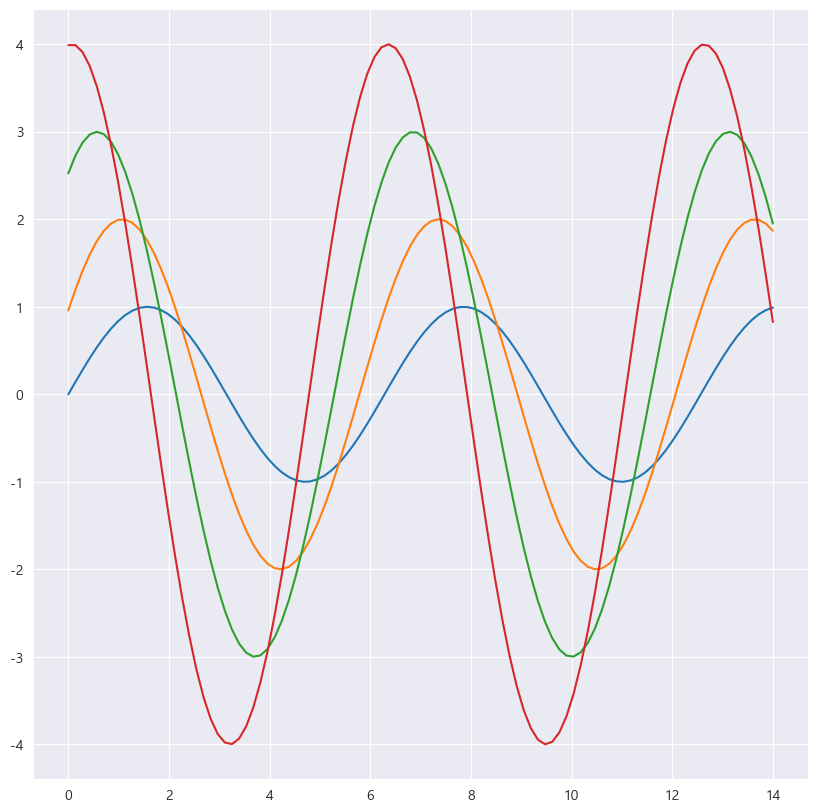

In [324]:
### 넘파이로 데이터 생성
x=np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2* np.sin(x+0.5)
y3 = 3* np.sin(x+1.0)
y4 = 4* np.sin(x+1.5)

### 데이터 시각화
plt.figure(figsize=(10,10))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

## 2) Seaborn  스타일 설정
- sns.set_style("스타일명") : 스타일 설정
- 스타일명 : dark, white, darkgrid, whitegrid, ticks

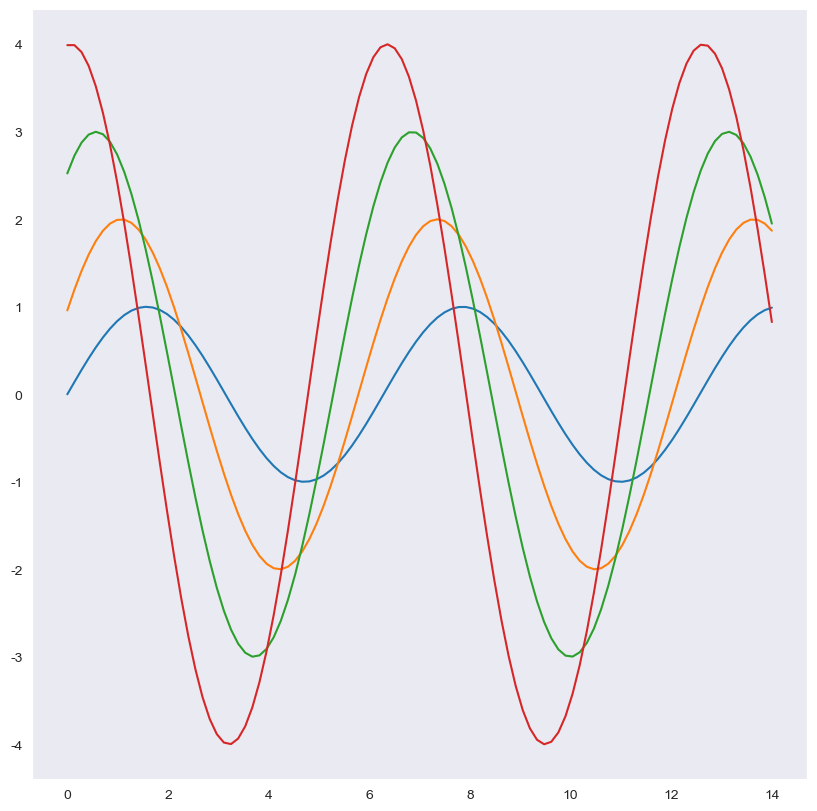

In [325]:
sns.set_style("dark") # 스타일 설정
plt.figure(figsize=(10,10))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

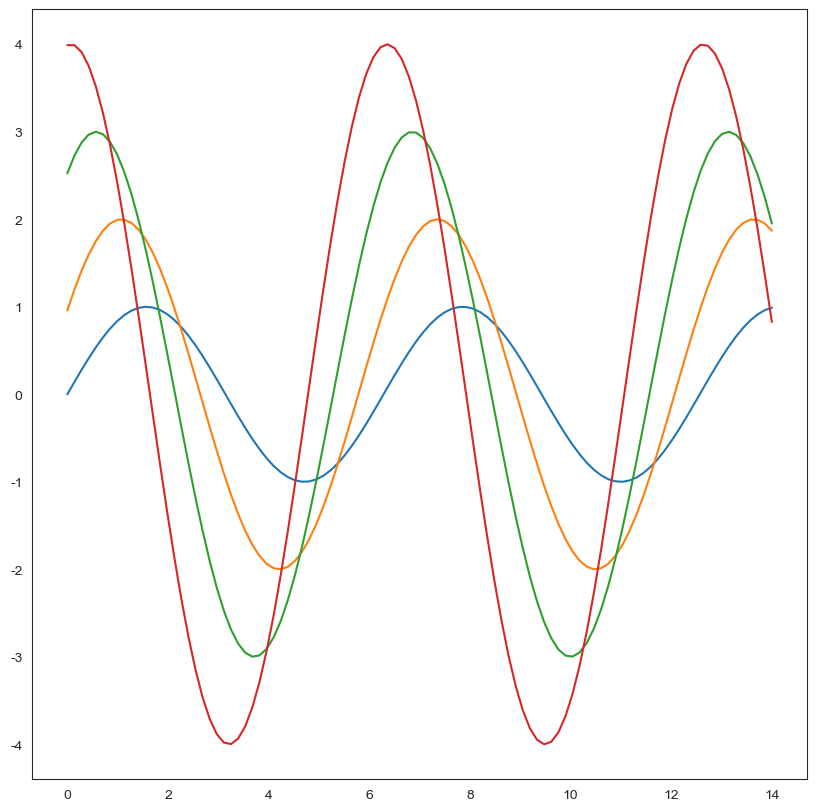

In [326]:
sns.set_style("white") # 스타일 설정
plt.figure(figsize=(10,10))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

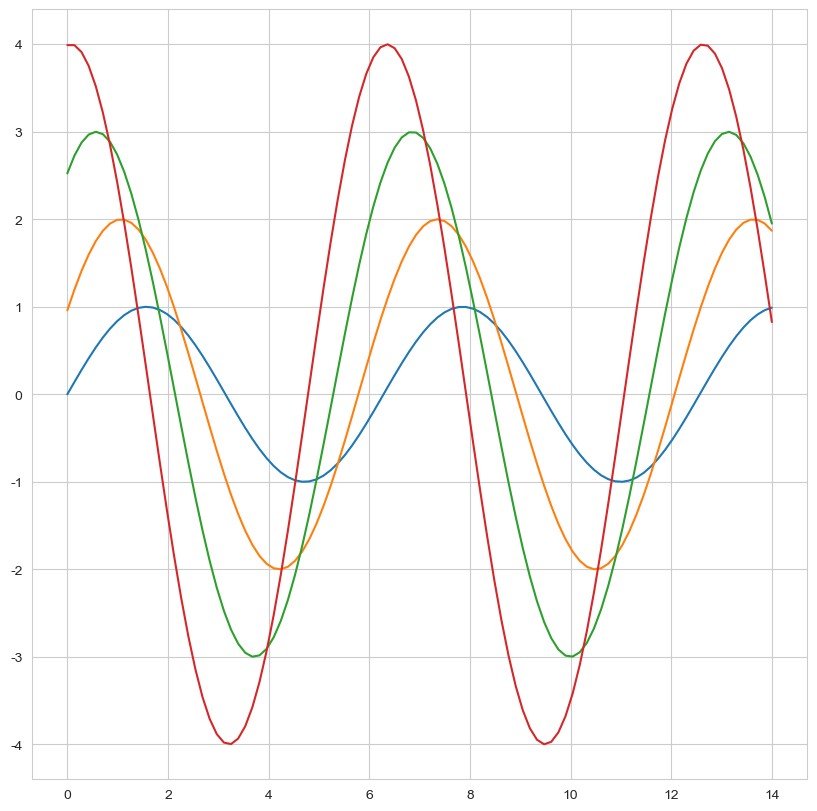

In [327]:
sns.set_style("whitegrid") # 스타일 설정
plt.figure(figsize=(10,10))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

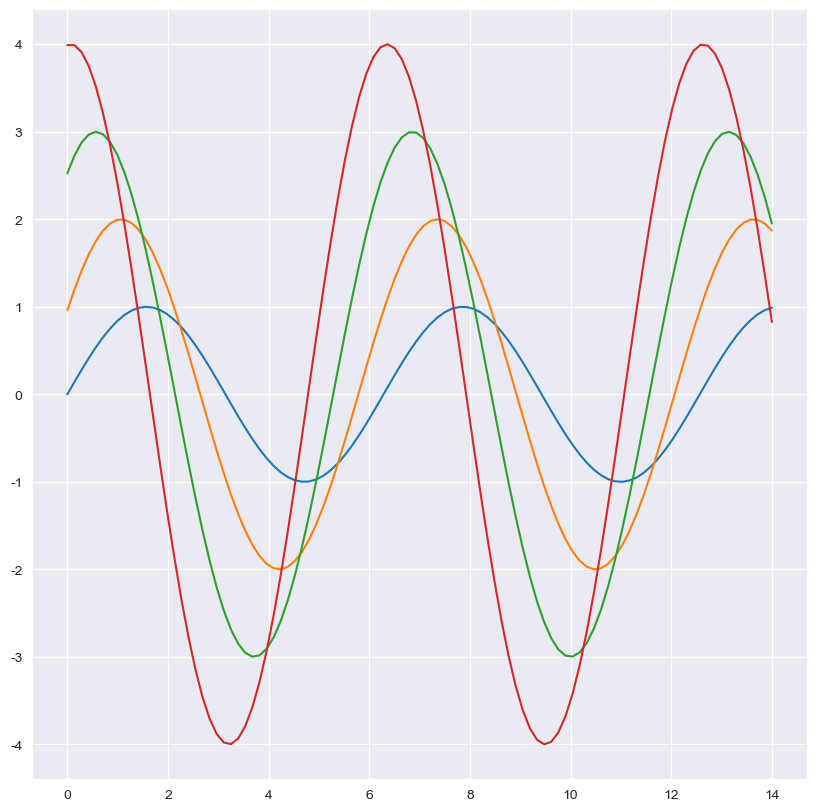

In [328]:
sns.set_style("darkgrid") # 스타일 설정
plt.figure(figsize=(10,10))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

## 3) Seaborn의 그래프 종류
- boxplot : 박스 플롯
- swarmplot : 스웜 플롯
- lmplot : 선형 회귀 플롯

In [329]:
### 데이터 생성 - sns가 제공하는 기본 데이터
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- 총 244개의 데이터

In [330]:
### 데이터 확인
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### 박스 플롯

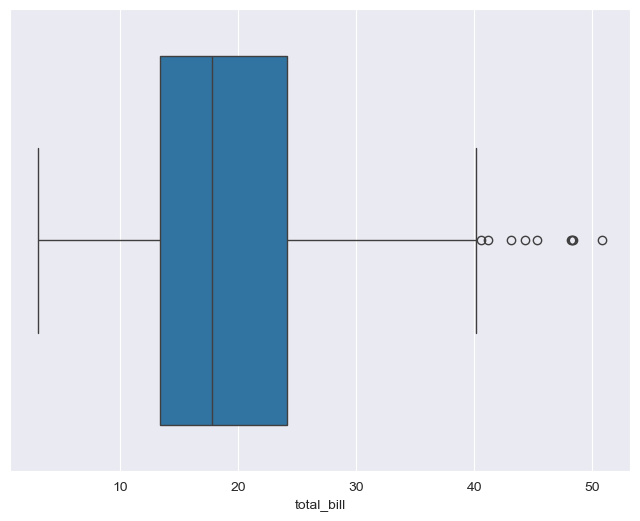

In [331]:
plt.figure(figsize=(8,6))
sns.boxplot(x=tips["total_bill"])
plt.show()

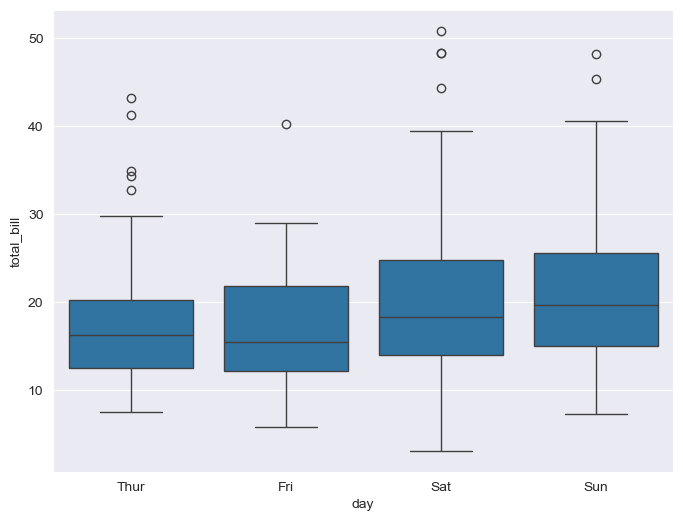

In [332]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

#### boxplot 옵션
- hue : 범주형 데이터로 색상 구분
- palette : 색상 컬러셋


<Axes: xlabel='day', ylabel='total_bill'>

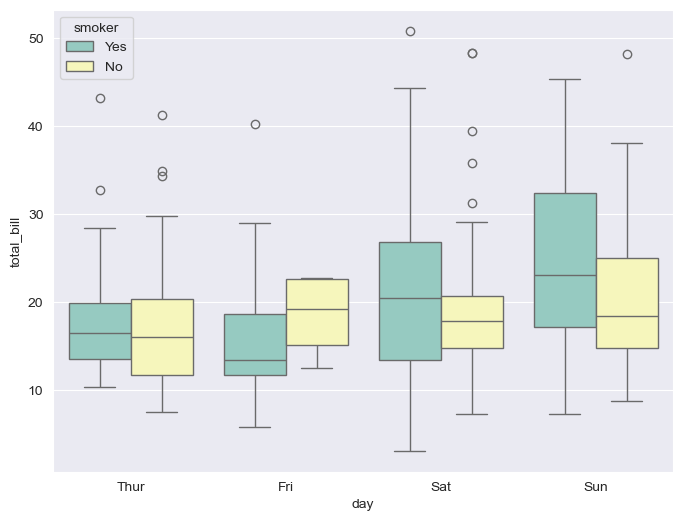

In [333]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill",data=tips,hue="smoker",palette="Set3")

## swarmplot
- color : 0~1까지의 숫자 - 흰색 ~ 검정색 부여

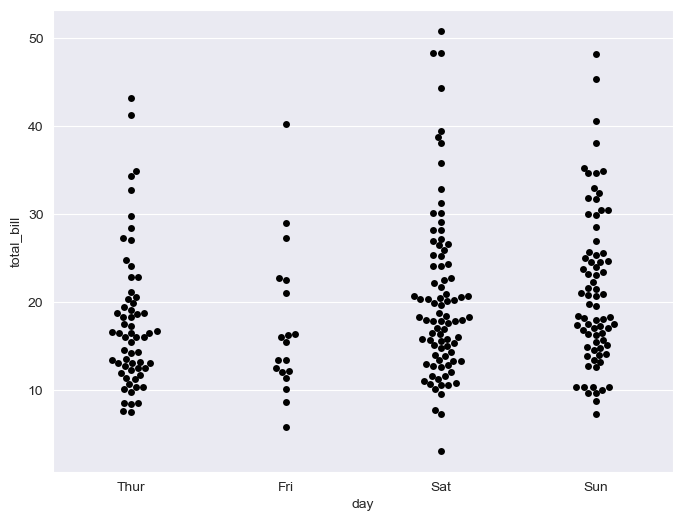

In [334]:
plt.figure(figsize=(8,6))
sns.swarmplot(x="day", y="total_bill", data=tips,color="0")
plt.show()

## boxplot + swarmplot

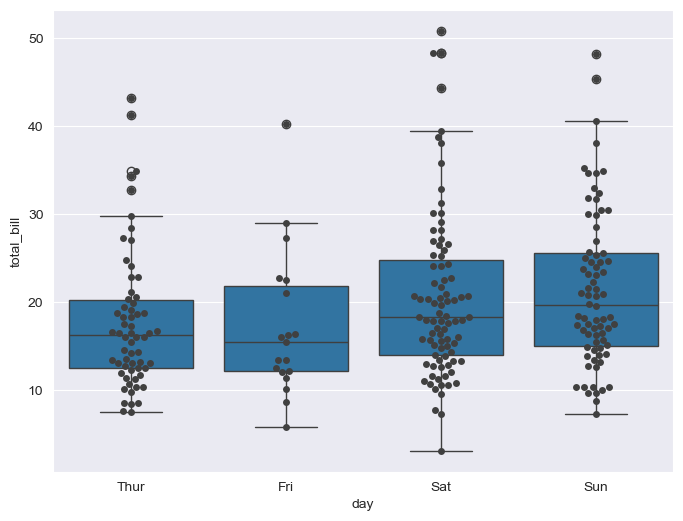

In [335]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill",data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips,color="0.25")
plt.show()

## lmplot
- total_bill과 tip의 관계 파악

C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


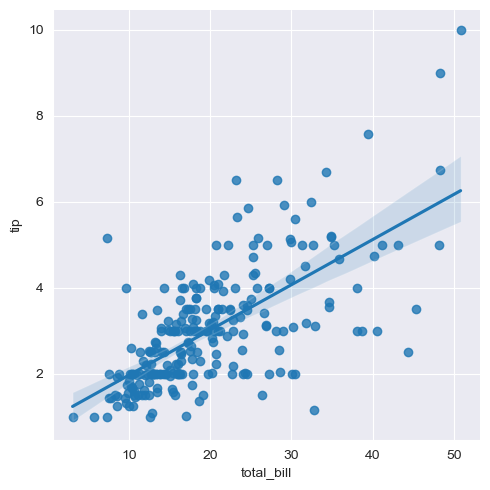

In [336]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, height=5) ### size > height 로 변경
plt.show()

### hue 옵션

C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


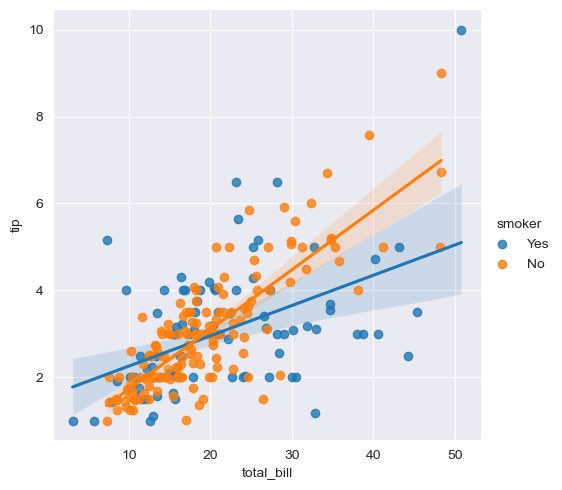

In [337]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, height=5,hue="smoker")

## heatmap 그래프

In [338]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [339]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


### pivot 기능 이용

In [340]:
flights = flights.pivot(index="month", columns="year", values="passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


### heatmap 그리기
- annot=True : 숫자 표시
- fmt="d" : 정수로 표시

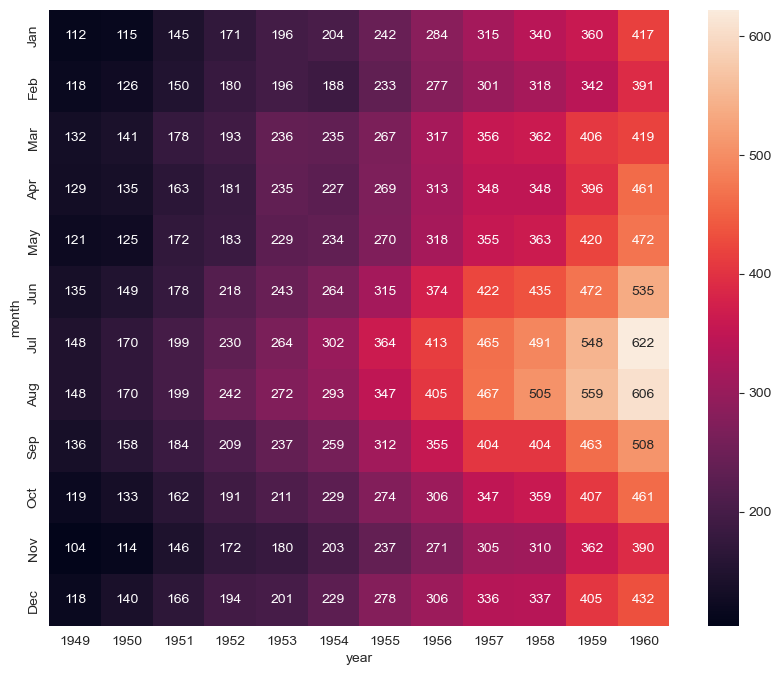

In [341]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=flights, annot=True,fmt="d")
plt.show()

#### colormap
- 색상 맵을 설정 할 수 있음

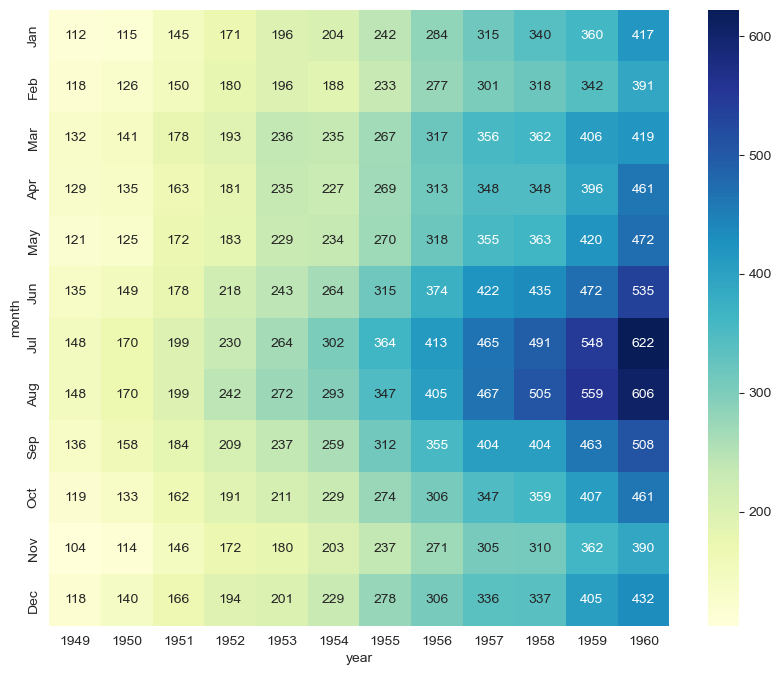

In [342]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=flights, annot=True,fmt="d",cmap="YlGnBu")
plt.show()

## pariplot
- pairplot은 여러 변수의 관계를 한 번에 시각화 할 수 있는 그래프

In [343]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [344]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


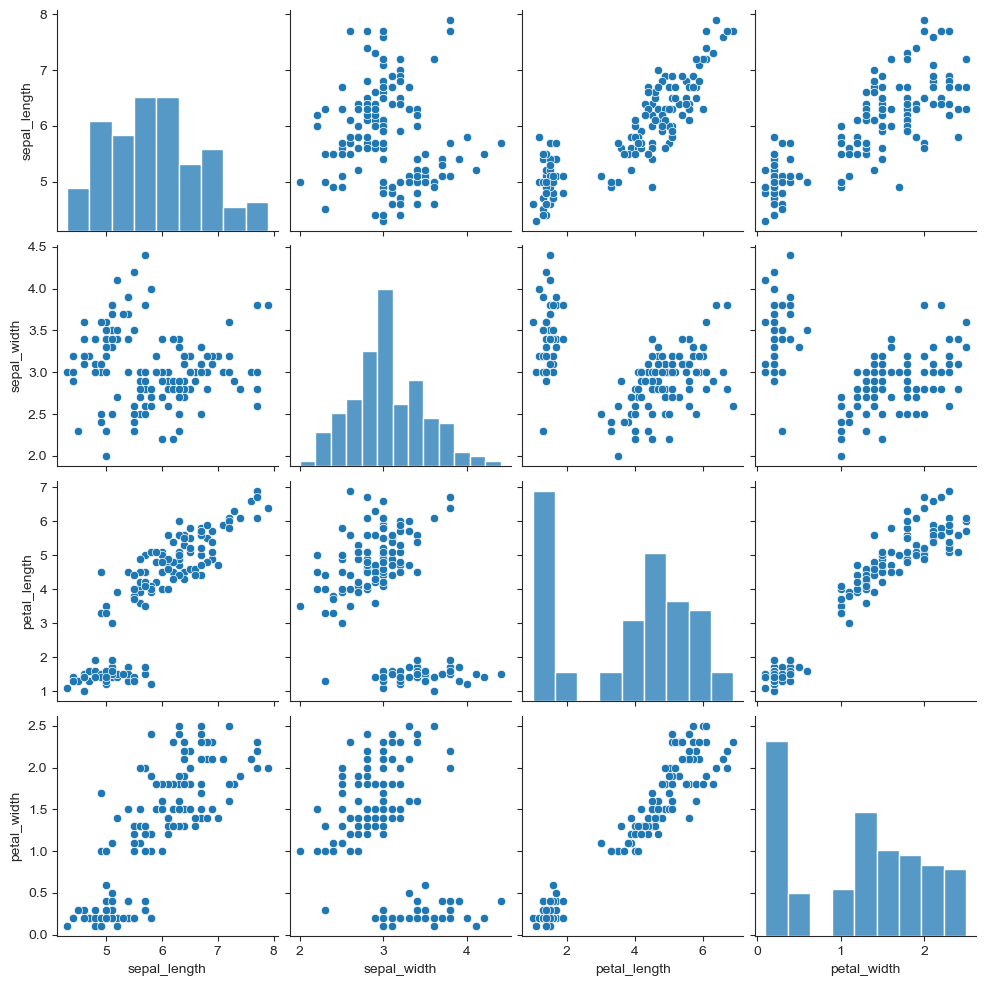

In [345]:
sns.set_style("ticks")
sns.pairplot(iris)
plt.show()

### hue 옵션

C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


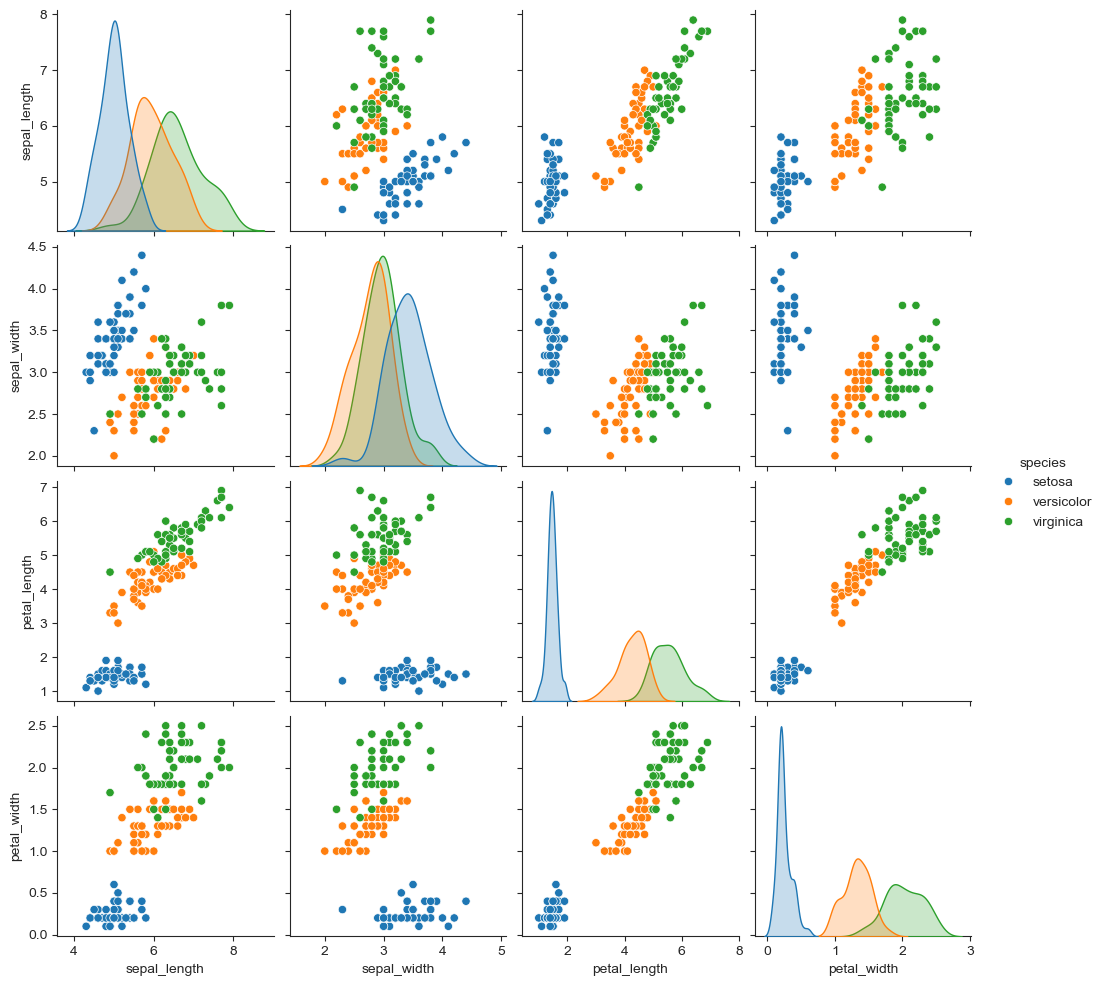

In [346]:
sns.set_style("ticks")
sns.pairplot(iris,hue="species")
plt.show()

In [347]:
### 데이터 보기
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### 원하는 부분만 pairplot

C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


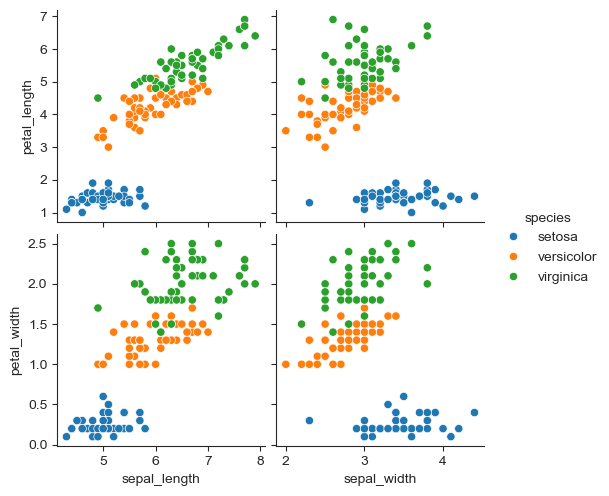

In [348]:
sns.pairplot(iris, x_vars=["sepal_length", "sepal_width"],
             y_vars=["petal_length", "petal_width"],
             hue="species")

## lmplot 추가
- ci : 신뢰 구간
- query : 데이터 필터링
- scatter_kws : 산점도 옵션(s: 크기)
- robust : 강건 회귀 - 아웃라이어를 제외하고 회귀선 그리기
- order : 회귀선의 차수

In [349]:
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [350]:
anscombe["dataset"].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


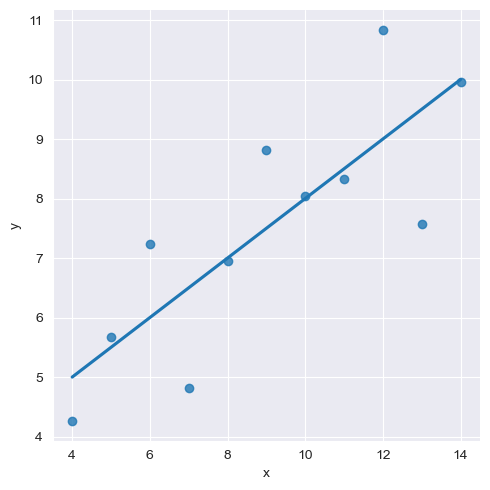

In [351]:
sns.set_style("darkgrid")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None,height=5)

C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


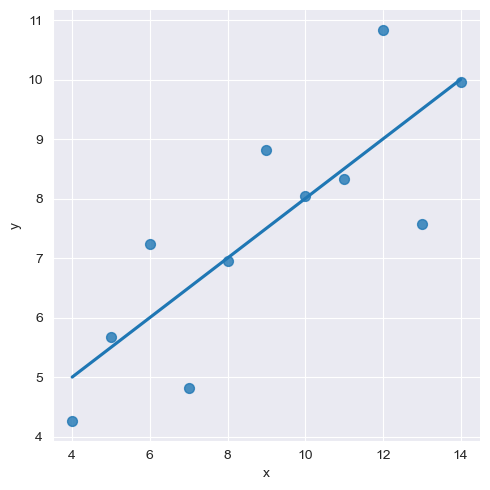

In [352]:
sns.set_style("darkgrid")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None,height=5,scatter_kws={"s": 50})
plt.show()

C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


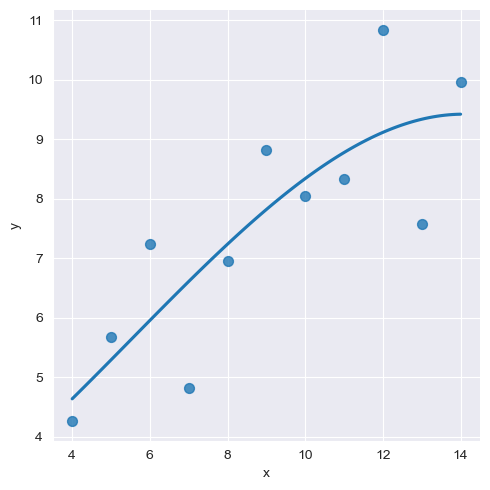

In [353]:
sns.set_style("darkgrid")
sns.lmplot(x="x",
           y="y",
           data=anscombe.query("dataset == 'I'"),
           ci=None,height=5,
           scatter_kws={"s": 50},
           order=3)
plt.show()

C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


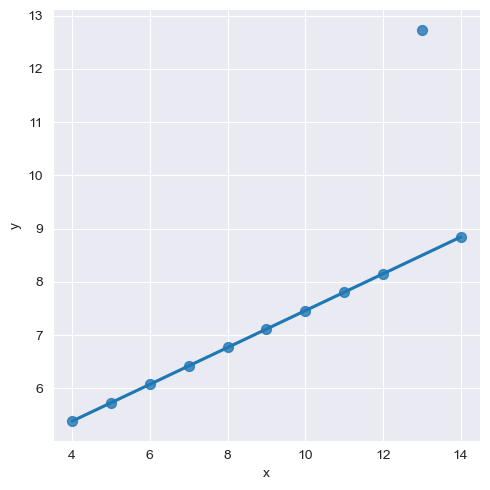

In [354]:
sns.set_style("darkgrid")
sns.lmplot(x="x",
           y="y",
           data=anscombe.query("dataset == 'III'"),
           ci=None,height=5,
           scatter_kws={"s": 50},
           robust=True)
plt.show()

---

# 8.서울시 범죄 데이터 시각화 N

In [355]:
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.813617,0.773418,0.970181,561052,3238,0.876923,0.911443
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,1.000000,0.928571,0.965702,0.743830,0.957688,440359,1010,0.419583,0.919158
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,0.857143,0.800000,0.744830,0.795417,0.983544,328002,831,0.424407,0.836187
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,1.000000,1.000000,0.883456,0.792868,0.951038,608255,911,0.565290,0.925472
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,1.000000,0.833333,0.833427,0.644462,0.921167,520929,2109,0.557578,0.846478


## pairplot 을 이용한 강도 / 살인 / 폭력 상관관계 확인

C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  self._figure.t

C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\IPython\

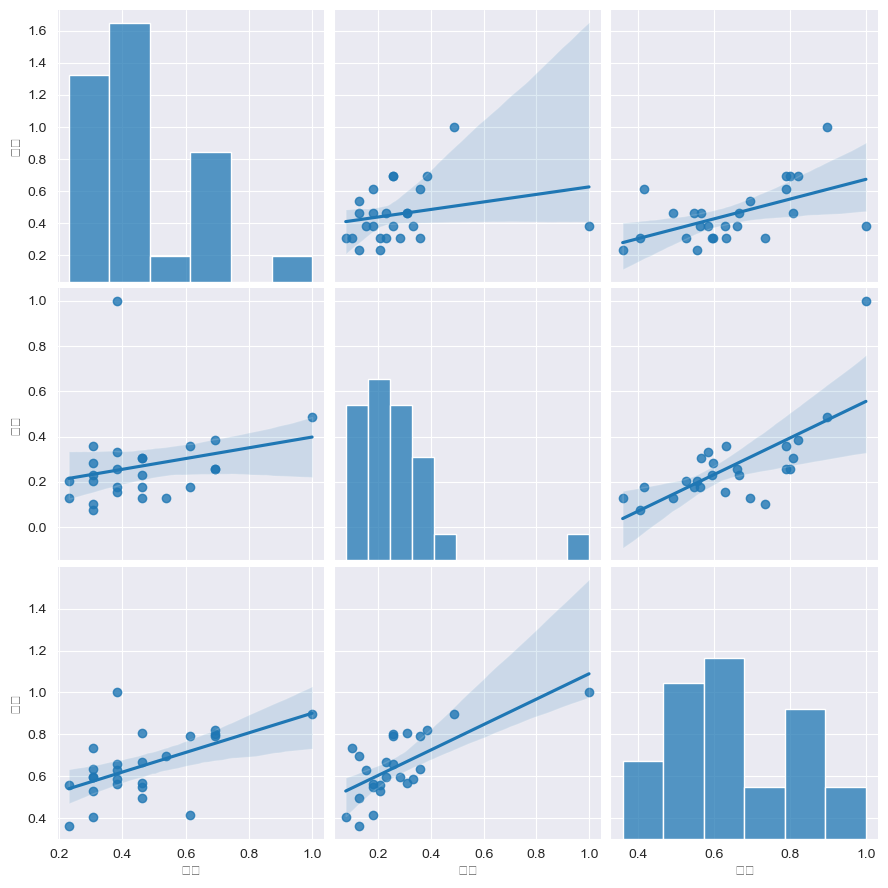

In [356]:
sns.pairplot(data=crime_anal_norm, vars=["살인", "강도", "폭력"],kind="reg",height=3)

### 인구수 - CCTV 와 살인 - 강도의 상관관계

C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  self._figure.ti

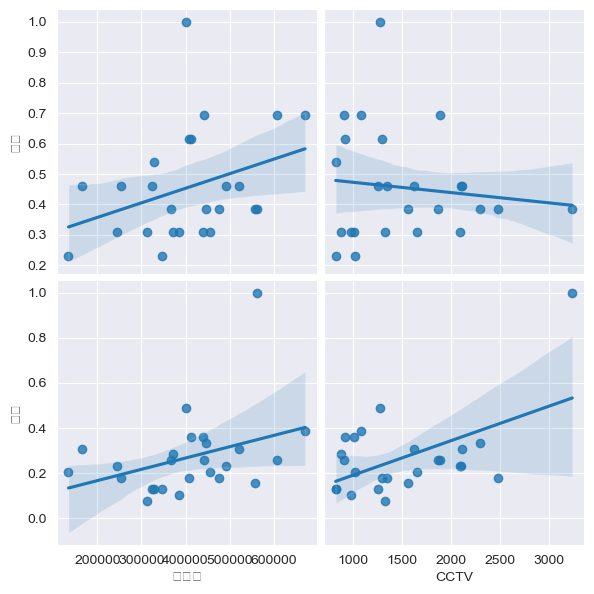

In [357]:
def drawGraph():
    sns.pairplot(
        data=crime_anal_norm,
        x_vars=["인구수","CCTV"],
        y_vars=["살인","강도"],
        kind="reg",
        height=3
    )
    plt.show()

drawGraph()

### 인구수/CCTV와 살인 검거율과 폭력검거율 사이 상관관계

C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  self._figure.

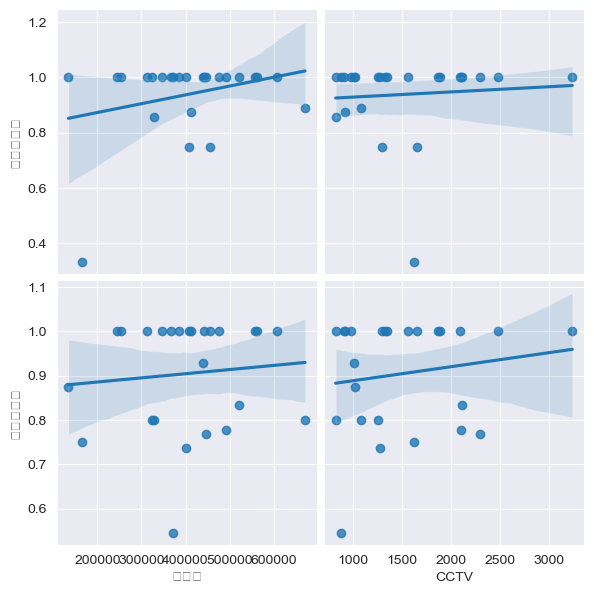

In [358]:
def drawGraph():
    sns.pairplot(
        data=crime_anal_norm,
        x_vars=["인구수","CCTV"],
        y_vars=["살인검거율","강도검거율"],
        kind="reg",
        height=3
    )
    plt.show()

drawGraph()

## Heatmap
- 검거 컬럼을 기준으로 정렬

C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 46020 (\N{HANGU

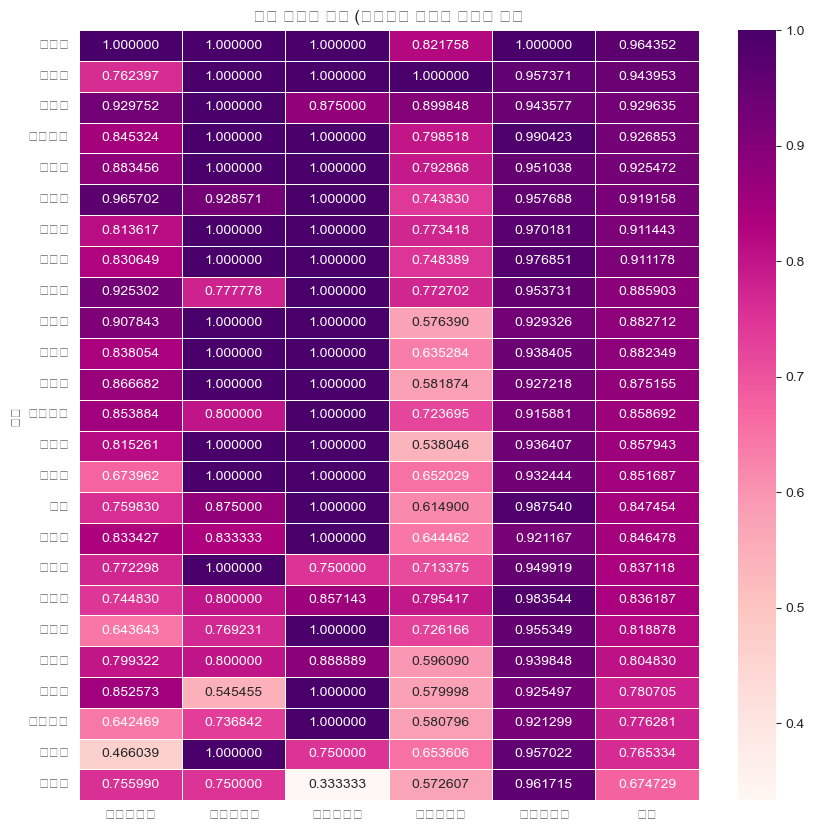

In [359]:
def drawGraph():
    ### 데이터 프레임 생성
    target_col = ["강간검거율","강도검거율","살인검거율","절도검거율","폭력검거율","검거"]
    crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거",ascending=False)

    ### 그래프 생성
    plt.figure(figsize=(10,10))
    sns.heatmap(
        data=crime_anal_norm_sort[target_col],
        annot=True,
        fmt="f",
        linewidths=0.5, ### 간격설정
        cmap="RdPu"
    )
    plt.title("범죄 검거율 비율 (정규화된 검거의 합으로 정렬")
    plt.show()

drawGraph()

### 범죄 발생 건수 히트맵
- 범죄 컬럼을 기준으로 정렬

C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51208 (\N{HANGUL S

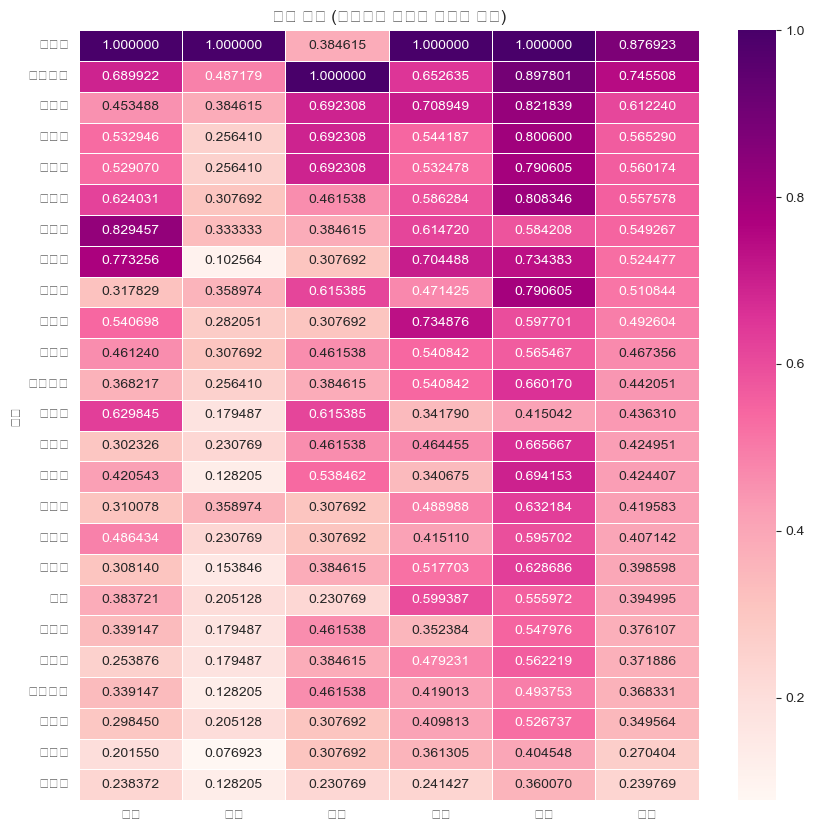

In [360]:
def drawGraph():
    ### 데이터 프레임 생성
    target_col = ["강간","강도","살인","절도","폭력","범죄"]
    crime_anal_norm_sort = crime_anal_norm.sort_values(by="범죄",ascending=False)

    ### 그래프 생성
    plt.figure(figsize=(10,10))
    sns.heatmap(
        data=crime_anal_norm_sort[target_col],
        annot=True,
        fmt="f",
        linewidths=0.5, ### 간격설정
        cmap="RdPu"
    )
    plt.title("범죄 비율 (정규화된 검거의 합으로 정렬)")
    plt.show()

drawGraph()

In [361]:
### 데이터 저장
crime_anal_norm.to_csv("../../data/02.Seoul_Crime/02. crime_in_Seoul_final.csv",sep=",",encoding="utf-8")

----

# 9.folium

In [362]:
import folium
import json

## folium.Map()
- location : 위도 경도 튜플 혹 은 리스트
- zoom_start : 지도가 얼마나 확대 시킬지

In [363]:
m = folium.Map(location=[37.478614, 126.833260],zoom_start=15)
m

## save()
- html로 저장

In [364]:
m.save("../../data/02.Seoul_Crime/folium.html")

In [365]:
!dir ..\..\data\02.Seoul_Crime\ | findstr "html"

2025-06-01  ���� 04:47             3,131 folium.html


### tiles 옵션
- "OpenStreetMap"
- "Stamen Terrain"
- "Stamen Toner"
- "Stamen Watercolor"
- "CartoDB positron
- "CartoDB dark_matter"

In [366]:

m = folium.Map(
    location=[37.478614, 126.833260],
    zoom_start=14,
    tiles="CartoDB positron"
)
m

## folium.Marker
- 원하는 위치를 찍을 수 있음
- 기본적으로 지도가 있는 상태에서 사용가능
- location : 마커 위치 지정
- popup=문자열 : 클릭 시 문자열이 팝업
    - html 문법 사용 가능
- tooltip : 클릭하지 않아도 문자열이 출력

In [367]:
m = folium.Map(
    location=[37.478614, 126.833260],
    zoom_start=14
)
folium.Marker(location=(37.478614, 126.833260),
              popup="<b>천왕산</b>",
              tooltip="<b>천왕산 캠핑장</b>",
              ).add_to(m)

folium.Marker(location=(37.467286, 126.845297),
               popup="<a href='https://www.kcycle.or.kr/main/' target=_'blink'>경륜장</a>",
              tooltip="<b>경륜장</b>",
              ).add_to(m)
m

## folium.Icon
- color : 아이콘의 전체적인 색상
- icon_color : 아이콘의 안쪽 색상
- icon : 아이콘 모양
- angle : 아이콘의 각도
- prefix : 아이콘 경로 / fa : font-awsome

In [368]:
## folium.Icon
m = folium.Map(
    location=[37.478614, 126.833260],
    zoom_start=14
)
folium.Marker(location=(37.478614, 126.833260),
              popup="<b>천왕산</b>",
              tooltip="<b>천왕산 캠핑장</b>",
              icon=folium.Icon(
                  color='black',
                  icon_color="pink",
                  icon = "cloud"
                )
              ).add_to(m)

folium.Marker(location=(37.467286, 126.845297),
               popup="<a href='https://www.kcycle.or.kr/main/' target=_'blink'>경륜장</a>",
              tooltip="<b>경륜장</b>",
               icon=folium.Icon(
                  color='lightblue',
                  icon_color="white",
                  icon = "apple",
                  angle=50,
                  prefix="fa"
                )
              ).add_to(m)
m

## folium.ClickForMakrer()
- 지도 위에 마우스를 클릭했을 때 마커 생성
- m.add_child(folium.ClickForMarker(popup="문자열"))
    - add_child : 특성을 추가함
    - folium.ChlickForMarker : 클릭 시 마커를 추가
    - popup : 클릭 시 어떤 문구가 나올지 (Default는 위도 경도)

In [369]:
m = folium.Map(
    location=[37.478614, 126.833260],
    zoom_start=14
)
m.add_child(folium.ClickForMarker(popup="ClickForMarker"))
m

### folium.LatLngPopup()
- 지도를 마우스로 클릭했을 때 위도 경도 정보 반환

In [370]:
m = folium.Map(
    location=[37.478614, 126.833260],
    zoom_start=14
)
m.add_child(folium.LatLngPopup())
m

## folium.Circle()
- radius : 지름 (원의 크기)
- fill : 원을 색으로 채울지 말지
- fill_color : 채우는 색깔

In [371]:
m = folium.Map(
    location=[37.478614, 126.833260],
    zoom_start=14
)
folium.Circle(
    location=(37.467286, 126.845297),
    radius=100,### 반지름
    color="blue", ### 테두리 색깔
    fill=True, ### 원을 채울지 말지,
    fill_color="red",
    popup="Circle PopUp",
    tooltip="Circle Tooltip"
).add_to(m) ### m에 추가
m

## forlium.CircleMarker()
- radius : 지름 (원의 크기)
- fill : 원을 색으로 채울지 말지
- fill_color : 채우는 색깔

In [372]:
m = folium.Map(
    location=[37.478614, 126.833260],
    zoom_start=14
)
folium.Circle(
    location=(37.467286, 126.845297),
    radius=100,### 반지름
    color="blue", ### 테두리 색깔
    fill=True, ### 원을 채울지 말지,
    fill_color="red",
    popup="Circle PopUp",
    tooltip="Circle Tooltip"
).add_to(m)


folium.CircleMarker(
    location=(37.467386, 126.845397),
    radius=100,### 반지름
    color="cyan", ### 테두리 색깔
    fill=True, ### 원을 채울지 말지,
    fill_color="red",
    popup="CircleMarker PopUp",
    tooltip="CircleMarker Tooltip"
).add_to(m) ### m에 추가
m

## folium.Choropleth
- geo_data : 경계선 GeoJSON
- data : 사용 할 데이터 (Series 혹은 DataFrame)
- columns : 컬럼 지정
- key_on= 키 값으로 사용 할 데이터
- fill_color="BuPu",  # 색상 스케일
- fill_opacity=0.7,
- line_opacity=0.2,
- legend_name="Unemployment rate (%)"

In [373]:
import json
### 데이터 읽기
state_date = pd.read_csv("../../data/02.Seoul_Crime/02. US_Unemployment_Oct2012.csv")
state_date.tail(2)

,State,Unemployment
48,WI,6.8
49,WY,5.1


In [374]:
### 미국 좌표 찍기
m = folium.Map([34, -102],zoom_start=3)


folium.Choropleth(
    geo_data="../../data/02.Seoul_Crime/02. us-states.json",  # 경계선 GeoJSON
    data=state_date,  # 실업률 데이터프레임
    columns=["State", "Unemployment"],  # 컬럼 지정
    key_on="feature.id", 
    fill_color="BuPu",  # 색상 스케일
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment rate (%)"
).add_to(m)
m

#### 아파트 데이터 시각화

In [375]:
import pandas as pd
df = pd.read_csv("../../data/02.Seoul_Crime/02. 서울특별시 동작구_주택유형별 위치 정보 및 세대수 현황_20210825.csv", encoding="euc-kr")
df.info()
### 위도 경도 데이터가 빠진 경우 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      167 non-null    int64  
 1   분류      167 non-null    object 
 2   건물명     167 non-null    object 
 3   행정동     167 non-null    object 
 4   주소      167 non-null    object 
 5   세대수     167 non-null    int64  
 6   위도      163 non-null    float64
 7   경도      163 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.6+ KB


In [385]:
#### NaN 데이터 제거
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 0 to 166
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   분류      163 non-null    object 
 1   건물명     163 non-null    object 
 2   행정동     163 non-null    object 
 3   주소      163 non-null    object 
 4   세대수     163 non-null    int64  
 5   위도      163 non-null    float64
 6   경도      163 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 10.2+ KB


In [386]:
### 인덱스 초기화
### drop=Ture : 인덱스 없이
df = df.reset_index(drop=True)

In [387]:
df = df.rename(columns={"연번 ":"연번","분류 ":"분류"})
df.연번[:10]

AttributeError: 'DataFrame' object has no attribute '연번'

In [379]:
df.head()

,연번,분류,건물명,행정동,주소,세대수,위도,경도
0,1,아파트,노량진우성,노량진1동,서울특별시 동작구 만양로8길 50,901,37.510304,126.946866
1,2,아파트,노량진삼익,노량진1동,서울특별시 동작구 만양로 84,175,37.511367,126.945226
2,3,아파트,"신동아리버파크\r(분양 1,696,임대 925)",노량진1동,서울특별시 동작구 만양로 19,2621,37.507073,126.945718
3,4,아파트,노량진쌍용예가,노량진1동,서울특별시 동작구 장승배기로16길 134,299,37.510265,126.943676
4,5,아파트,형인한강,노량진1동,서울특별시 동작구 만양로 36,73,37.507664,126.948235


In [380]:
del df["연번"]

In [393]:
df.tail(2)

,분류,건물명,행정동,주소,세대수,위도,경도
161,연립주택,능내연립,사당5동,서울특별시 동작구 사당로8길 39,22,37.483599,126.968672
162,연립주택,천록,대방동,서울특별시 동작구 등용로 43,29,37.505475,126.933434


In [399]:
### 동작구 지도 출력
m = folium.Map(
    location=[37.500574, 126.950813],
    zoom_start=13
)

for idx, rows in df.iterrows():

    # location
    lat, lng = rows.위도, rows.경도

    # Marker
    folium.Marker(
        location=[lat, lng],
        popup=rows.주소,
        tooltip=rows.분류,
        icon=folium.Icon(
            icon="home",
            color="lightred" if rows.세대수 >= 199 else "lightblue",
            icon_color="darkred" if rows.세대수 >= 199 else "darkblue",
        )
    ).add_to(m)

    folium.Circle(
        location=[lat,lng],
        radius=rows.세대수*0.2,
        fill=True,
        color="pink" if rows.세대수 >= 518 else "green",
        fill_color="pink" if rows.세대수 >= 518 else "green"
    ).add_to(m)
m

----
# 10. 서울시 범죄 현황에 대한 지도 시각화

In [401]:
### 데이터 불러오기
import json
import folium
import pandas as pd

crime_anal_norm=pd.read_csv(
    "../../data/02.Seoul_Crime/02. crime_in_Seoul_final.csv", index_col=0, encoding="utf-8"
)

geo_path = "../../data/02.Seoul_Crime/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path,encoding="utf-8"))

### 데이터 확인
crime_anal_norm.tail(2)

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
중구,0.230769,0.205128,0.383721,0.599387,0.555972,1.000,0.875,0.759830,0.614900,0.987540,134593,1023,0.394995,0.847454
중랑구,0.615385,0.358974,0.317829,0.471425,0.790605,0.875,1.000,0.929752,0.899848,0.943577,412780,916,0.510844,0.929635


In [408]:
### 살인 범죄 건수
my_map = folium.Map(
    location=[37.5502,126.982],
    zoom_start=11,
    tiles="CartoDB positron"
    )

### 경계 그리기
folium.Choropleth(
    geo_data=geo_str, ### ,경계선 데이터
    data=crime_anal_norm["살인"],
    colums=[crime_anal_norm.index,crime_anal_norm["살인"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="정규화된 살인 발생 건수 "

).add_to(my_map)

my_map

In [410]:
### 성범죄 건수
my_map = folium.Map(
    location=[37.5502,126.982],
    zoom_start=11,
    tiles="CartoDB positron"
    )

### 경계 그리기
folium.Choropleth(
    geo_data=geo_str, ### ,경계선 데이터
    data=crime_anal_norm["강간"],
    colums=[crime_anal_norm.index,crime_anal_norm["강간"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="정규화된 강간 발생 건수 "

).add_to(my_map)

my_map

In [412]:
### 5대 범죄 건수
my_map = folium.Map(
    location=[37.5502,126.982],
    zoom_start=11,
    tiles="CartoDB positron"
    )

### 경계 그리기
folium.Choropleth(
    geo_data=geo_str, ### ,경계선 데이터
    data=crime_anal_norm["범죄"],
    colums=[crime_anal_norm.index,crime_anal_norm["범죄"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="정규화된 5대 범죄 발생 건수 "

).add_to(my_map)

my_map

In [415]:
### 인구 대비 범죄 건수

tmp_crime =  crime_anal_norm["범죄"] / crime_anal_norm["인구수"]
my_map = folium.Map(
    location=[37.5502,126.982],
    zoom_start=11,
    tiles="CartoDB positron"
    )

### 경계 그리기
folium.Choropleth(
    geo_data=geo_str, ### ,경계선 데이터
    data=tmp_crime,
    colums=[crime_anal_norm.index,tmp_crime],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="인구대비 발생 건수 "

).add_to(my_map)

my_map

In [424]:
### 경찰서 별 정보를 범죄 발생 정리
### 인구 대비 범죄 건수

### 경찰서 데이터 불러오기
crime_anal_station = pd.read_csv("../../data/02.Seoul_Crime/02. crime_in_Seoul_raw.csv",encoding="utf-8")
col = ["살인검거","강도검거","강간검거","절도검거","폭력검거"]
tmp =  crime_anal_station[col] / crime_anal_station[col].max()
crime_anal_station["검거"] = np.mean(tmp,axis=1)


my_map = folium.Map(
    location=[37.5502,126.982],
    zoom_start=11,
    tiles="CartoDB positron"
    )

### 경계선 데이터 추가
folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm["범죄"],
    columns=[crime_anal_norm.index, crime_anal_norm["범죄"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.2
).add_to(my_map)

### 경찰서 위치 마커 표시
for idx, rows in crime_anal_station.iterrows():
    folium.CircleMarker(
        location=[rows["lat"],rows["lng"]],
        ### 검거 값을 곱해 원의 넓이로 적용
        radius=rows["검거"]*50,
        popup=rows["구분"] + " : " + "%.2f " %rows["검거"],
        fill = True,
        color="#3186cc",
        fill_color="#3186cc"
    ).add_to(my_map)



my_map

# 11. 서울시 범죄 현황 발생 장소 분석

In [427]:
## 추가 검증
crime_loc_raw = pd.read_csv(
    "../../data/02.Seoul_Crime/02. crime_in_Seoul_location.csv",
    thousands=",",
    encoding="euc-kr"
)

crime_loc_raw.tail()

,범죄명,장소,발생건수
60,폭력,교통수단,222
61,폭력,유원지,424
62,폭력,학교,203
63,폭력,금융기관,42
64,폭력,기타,26382


In [429]:
crime_loc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄명     65 non-null     object
 1   장소      65 non-null     object
 2   발생건수    65 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [430]:
crime_loc_raw.범죄명.unique()

array(['살인', '강도', '강간.추행', '절도', '폭력'], dtype=object)

In [431]:
crime_loc_raw["장소"].unique()

array(['아파트, 연립 다세대', '단독주택', '노상', '상점', '숙박업소, 목욕탕', '유흥 접객업소', '사무실',
       '역, 대합실', '교통수단', '유원지 ', '학교', '금융기관', '기타'], dtype=object)

In [434]:
crime_loc = crime_loc_raw.pivot_table(
    crime_loc_raw,
    index="장소",
    columns="범죄명",
    aggfunc=[np.sum]
)

### 멀티 밸류 제외
crime_loc.columns = crime_loc.columns.droplevel([0,1])
crime_loc.tail(2)

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
유흥 접객업소,398,13,8,2035,2645
학교,33,0,0,400,203


In [435]:
col = ["살인", "강도","강간","절도","폭력"]
### 데이터 정규화
crime_loc_norm = crime_loc / crime_loc.max()
crime_loc_norm.head()

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592
기타,1.000000,0.770115,1.000000,1.000000,1.000000
노상,0.463346,1.000000,0.338462,0.429235,0.929990
단독주택,0.185620,0.172414,0.461538,0.103110,0.135661


In [436]:
crime_loc_norm["종합"] = np.mean(crime_loc_norm, axis=1)
crime_loc_norm.tail(2)

범죄명,강간.추행,강도,살인,절도,폭력,종합
장소,,,,,,
유흥 접객업소,0.187030,0.149425,0.123077,0.093632,0.100258,0.130684
학교,0.015508,0.000000,0.000000,0.018404,0.007695,0.008321


In [438]:
### 시각화 진행
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
rc("font",family="Malgun Gothic")
%matplotlib inline

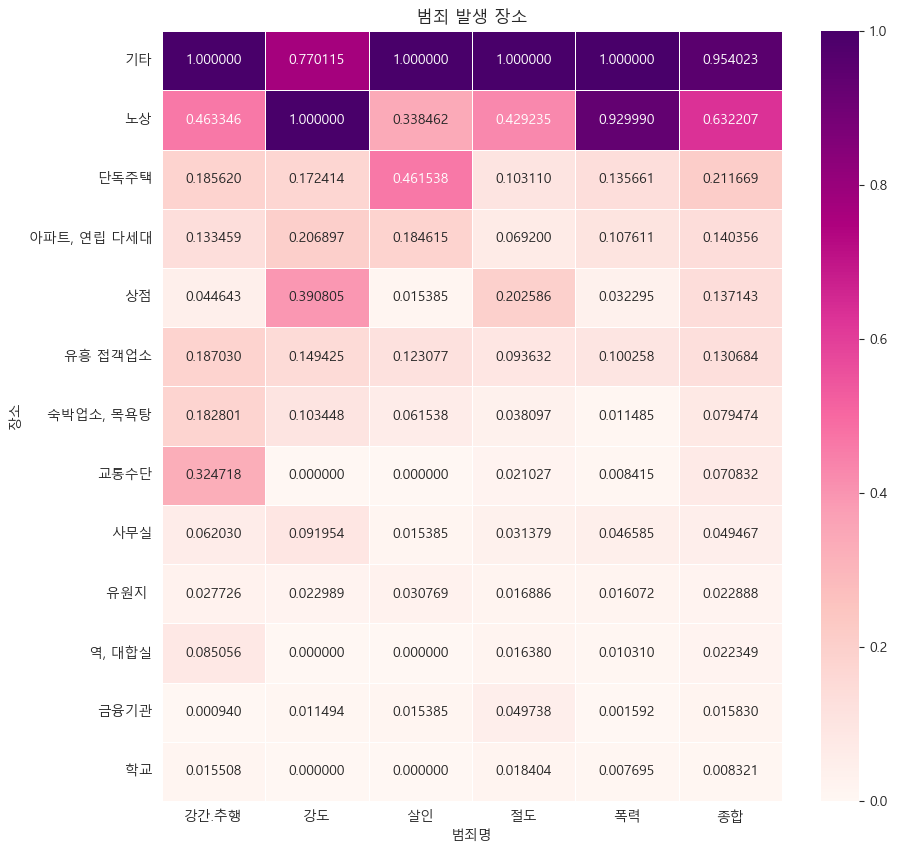

In [440]:
crime_loc_norm_sort = crime_loc_norm.sort_values("종합",ascending=False)

def drawGraph():
    plt.figure(figsize=(10,10))
    sns.heatmap(
        crime_loc_norm_sort,
        annot=True,
        fmt="f",
        linewidths=0.5,
        cmap="RdPu"
    )
    plt.title("범죄 발생 장소")
    plt.show()

drawGraph()